$$
\boldsymbol{q}=\varepsilon \cdot \boldsymbol{E}_{G} \cdot \boldsymbol{\sigma A}\left(\boldsymbol{T}_{1}^{4}-\boldsymbol{T}_{2}^{4}\right)
$$

$$
q=\varepsilon \cdot E_{G} \cdot \sigma A (T_{1}^{4}-T_{2}^{4})
$$

$$
\mathrm{d}_{\mathrm{W}}=\frac{2\left(\mathrm{d}_{0}^{3}-\mathrm{d}_{\mathrm{h}}^{3}\right)}{3\left(\mathrm{d}_{0}^{2}-\mathrm{d}_{\mathrm{h}}^{2}\right)}
$$

$$
T=\frac{F}{2}(\frac{d_{2}}{\cos \alpha} \mu_{{s}}+\frac{{P}}{\pi}+{d}_{{W}} \mu_{{W}})
$$

$$
F=\frac{2T}{\frac{d_2}{\cos \alpha}\mu_{s}+\frac{P}{\pi}+d_{W} \mu_{W}}
$$

式と変数を確認して、インプットを修正する

In [3]:
import re
# a = "sigma=(E alpha DeltaT)/(1-nu)*(1)/(1.5+3.25//beta-0.5 exp(-16//beta))"
# a = "M_(max)=(w*l^(2))/(8)"
# a= "delta_(max)=(5*w*l^(4))/(384 E*I)"
# a = "q=epsi*E_(G)*sigma A(T_(1)^(4)-T_(2)^(4))"
# a="d_(W)=(2(d_(0)^(3)-d_(h)^(3)))/(3(d_(0)^(2)-d_(h)^(2)))"
a= "T=F/2((d_(2))/(cos alpha)mu_(s)+P/pi+d_(W)mu_(W))"
# a ="K=(1.7 xx10^(5))/((delta_(1)+delta_(0))/(lambda_(1))+(delta_(2)+delta_(0))/(lambda_(2)))xx(0.6P)/(H)+(10^(6)lambda_(f))/(delta_(1)+delta_(2))"
shoki_tikan_dict = {" ":"*",
                   "xx":"*",
                   "^":"**",
                   "//":"/"}
for i in shoki_tikan_dict:
    a = a.replace(i,shoki_tikan_dict[i])
    
temp = re.sub("_\((.*?)\)","0",a)#添字を無視して変数を取得できるよう、_()を0に変換
hensu = re.findall("[A-Za-z]+",temp)#変数を抜き出します
li_moji = list(set(hensu))#変数の重複を消す
print(a)
print(li_moji)

T=F/2((d_(2))/(cos*alpha)mu_(s)+P/pi+d_(W)mu_(W))
['pi', 'mu', 'cos', 'P', 'd', 'alpha', 'F', 'T']


添字と特殊文字を変換する

In [4]:
moji_dict = {'lambda':"λ",
             'delta':"δ",
            'sigma':"σ",
            'alpha':"α",
            'DeltaT':"ΔT",
            'nu':'ν',
            'beta':'β',
            'epsi':"ε",
            'pi':'π',
            'mu':'μ'}


def tikan(moji_retsu,taisho,moji_dict):
#     print(taisho)
    taisho_temp = taisho+"_"
    seiki_1 = taisho_temp + "\(.*?\)"
    seiki_2 = taisho_temp + "\((.*?)\)"
    b = re.findall(seiki_1,moji_retsu)

    if len(b) != 0:
        if taisho in moji_dict:
            tikan_moji = moji_dict[taisho]
        else:
            tikan_moji = taisho
#             print(tikan_moji)
            
        newList = [re.sub(seiki_2,tikan_moji+"\\1",item) for item in b]
        moji_retsu = re.sub(seiki_2,tikan_moji+"\\1",moji_retsu)

    elif taisho in moji_dict:
        tikan_moji = moji_dict[taisho]
        newList = [tikan_moji]
        moji_retsu = moji_retsu.replace(taisho,tikan_moji)

    else:
        tikan_moji = taisho
        newList = [taisho]
        
    return moji_retsu,newList

li=[]
for i in li_moji:
    a,p = tikan(a,i,moji_dict)
    li.extend(p)
li=list(set(li))
li.sort()

a = re.sub("\(([0-9])\)","\\1",a)
print(a)
print(li)

T=F/2((d2)/(cos*α)μs+P/π+dWμW)
['F', 'P', 'T', 'cos', 'd2', 'dW', 'α', 'μW', 'μs', 'π']


In [5]:
print("paramater_dict= {")
for i in li:
    print("    " + "'" + i +"':['',''],")
print("    }")

paramater_dict= {
    'F':['',''],
    'P':['',''],
    'T':['',''],
    'cos':['',''],
    'd2':['',''],
    'dW':['',''],
    'α':['',''],
    'μW':['',''],
    'μs':['',''],
    'π':['',''],
    }


In [6]:
paramater_dict= {
    'F':['ボルトの軸力','N'],
    'P':['ピッチ','mm'],
    'T':['トルク','N・mm'],
    'd2':['ねじの有効径','mm'],
    'dW':['等価摩擦直径','mm'],
    'α':['ねじ山の半角（通常は30°）','°'],
    'μW':['座面摩擦係数',''],
    'μs':['ねじ面の摩擦係数','']
    }

In [7]:
for i in paramater_dict:
    print( i + " = ")

F = 
P = 
T = 
d2 = 
dW = 
α = 
μW = 
μs = 


In [27]:
# A = (0.001*0.001)
import math
F = 10
P = 10
d2 = 10
dW = 10
α = 30
μW = 10
μs = 10
d0 = 15
dh = 12

T=F/2*(d2/math.cos(math.radians(α))*μs+P/math.pi+dW*μW)
F=2*T/(d2/math.cos(math.radians(α))*μs+P/math.pi+dW*μW)
dW=(2*(d0**3-dh**3))/(3*(d0**2-dh**2))
print(T)
print(F)
print(dW)

1093.2657634988152
10.0
13.555555555555555


In [21]:
P/math.pi()+dW*μW

TypeError: 'float' object is not callable

In [23]:
math.pi

3.141592653589793

In [12]:
3(do**2-dh**2)

TypeError: 'int' object is not callable

In [175]:
li=[]
a,p = tikan(a,"lambda",moji_dict)
li.extend(p)
a,p = tikan(a,"delta",moji_dict)
li.extend(p)

{'δ0', 'δ1', 'δ2', 'λ1', 'λ2', 'λf'}

In [134]:
li

['λ1', 'λ2', 'λf', 'δ1', 'δ0', 'δ2', 'δ0', 'δ1', 'δ2']

In [127]:
p

['λ1', 'λ2', 'λf']

In [111]:
a,li = tikan(a,"delta_","δ",li)

AttributeError: 'NoneType' object has no attribute 'append'

In [62]:
a ="K=(1.7 xx10^(5))/((delta_(1)+delta_(0))/(lambda_(11))+(delta_(2)+delta_(0))/(lambda_(2)))xx(0.6P)/(H)+(10^(6)lambda_(fbb))/(delta_(1)+delta_(2))"
a = a.replace(" ","").replace("xx","*")
a = re.sub("\^\(([0-9])\)","**\\1",a)
b = re.findall("lambda_\(.*?\)",a)
a = re.sub("lambda_\((.*?)\)","λ\\1",a)
a = re.sub("delta_\((.*?)\)","λ\\1",a)


In [63]:
b

['lambda_(11)', 'lambda_(2)', 'lambda_(fbb)']

In [66]:
newList = [re.sub("lambda_\((.*?)\)","λ\\1",item) for item in b]

In [67]:
newList

['λ11', 'λ2', 'λfbb']

In [64]:
list1 = ['item1-1', 'item1-2', 'item1-3']
newList = [item + "-1" for item in list1]

In [11]:
a = "K=(1.7 xx10^(5))/((delta_(1)+delta_(0))/(lambda_(1))+(delta_(2)+delta_(0))/(lambda_(2)))xx(0.6P)/(H)+(10^(6)lambda_(f))/(delta_(1)+delta_(2))"

a = a.replace("^","**")
a = a.replace("xx","*")
a = a.replace("delta_(","δ")
a = a.replace("lambda_(","λ")

In [12]:
a

'K=(1.7 *10**(5))/((δ1)+δ0))/(λ1))+(δ2)+δ0))/(λ2)))*(0.6P)/(H)+(10**(6)λf))/(δ1)+δ2))'

In [13]:
K=(1.7 *10**5)/((δ1+δ0)/(λ1)+(δ2+δ0)/(λ2))*(0.6P/H)+(10**6*λf)/(δ1+δ2)

SyntaxError: invalid syntax (<ipython-input-13-495ba895a384>, line 1)

In [10]:
paramater_dict= {
    "K":["接触部のコンダクタンス","W/m2K"],#この値を接触条件として熱解析へインプット
    "δ1":["材料1の表面粗さ","μm"],#Ra :中心線平均粗さ
    "δ2":["材料2の表面粗さ","μm"],#Ra :中心線平均粗さ
    "λ1":["材料1の熱伝導率","W/mK"],
    "λ2":["材料2の熱伝導率","W/mK"],
    "λf":["材料間物質の熱伝導率","W/mK"],#空気など
    "P":["接触面の押付圧力","MPa"],#ボルト締結による面圧など
    "H":["柔らかい方の材料のビッカース硬さ","kg/mm"],#つぶれやすい材料は密着するので熱が伝わります
    "δ0":["接触相当長さ(定数)","μm"]
    }

δ1 = 32
δ2 = 32
λ1 = 398#銅
λ2 = 398#銅
λf = 0.0241#空気
P = 1
H = 80#銅

δ0=23 #定数です(0.5<P<10MPa)
K = 1.7*10**6/((δ1+δ0)/λ1+(δ2+δ0)/λ2)*0.6*P/H +10**6*λf/(δ1+δ2)


In [12]:
paramater_dict= {
    "h":["コンダクタンス","W/m2K"],
    "λf":["隙間を満たす物質の熱伝導率","W/mK"],#空気など
    "δ":["接触相当長さ(定数)","μm"]
    }
λf = 0.0241#空気
δ = 50
h = 10**6*λf/δ

In [6]:
δ1 = 32
δ2 = 32
λ1 = 398#銅
λ2 = 398#銅
λf = 0.0241#空気
P = 1
H = 80#銅
δ0=23 #定数です(0.5<P<10MPa)
K=(1.7*10**5)/((δ1+δ0)/(λ1)+(δ2+δ0)/(λ2))*(0.6*P)/H+(10**6*λf)/(δ1+δ2)

In [7]:
intK

4989.744318181818

In [6]:
for i in paramater_dict:
    print(str(i) + " = " )

K = 
δ1 = 
δ2 = 
λ1 = 
λ2 = 
λf = 
P = 
H = 
δ0 = 


In [7]:
δ1 = 16
δ2 = 16
λ1 = 300
λ2 = 300
λf = 0.02
P = 0.5
H = 15

In [8]:
δ0=23 #定数です(0.5<P<10MPa)
K = 1.7*10**6/((δ1+δ0)/λ1+(δ2+δ0)/λ2)*0.6*P/H +10**6*λf/(δ1+δ2)

In [9]:
K

131394.23076923075

$
\mathrm{K}=\frac{1.7 \times 10^{5}}{\frac{\delta_{1}+\delta_{0}}{\lambda_{1}}+\frac{\delta_{2}+\delta_{0}}{\lambda_{2}}} \times \frac{0.6 \mathrm{P}}{\mathrm{H}}+\frac{10^{6} \lambda_{\mathrm{f}}}{\delta_{1}+\delta_{2}}
$

K
δ1
δ0
λ1
δ2
δ0
λ2
P
H
λf
δ1
δ2

In [2]:
a ="K
δ1
δ0
λ1
δ2
δ0
λ2
P
H
λf
δ1
δ2"

SyntaxError: EOL while scanning string literal (<ipython-input-2-fef24d6018e1>, line 1)

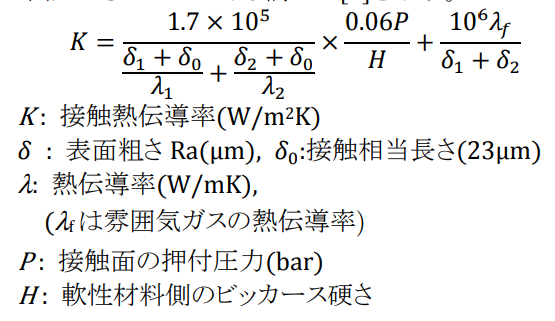

In [1]:
from sympy import Symbol,pi,Eq
from IPython.display import display
４from sympy.interactive import printing
printing.init_printing(use_latex=True,order='none')
# sympy.init_printing(order='none')

In [1]:
import sympy
sympy.init_printing(order='none')

In [3]:
from sympy import Symbol

In [4]:
K= Symbol('K')
eK= Symbol('K')
W_m2K= Symbol('({W/m^2K})')
δ1= Symbol('δ_1')
eδ1= Symbol('δ_1')
μm= Symbol('(μm)')
δ2= Symbol('δ_2')
eδ2= Symbol('δ_2')
λ1= Symbol('λ_1')
eλ1= Symbol('λ_1')
W_mK= Symbol('(W/mK)')
λ2= Symbol('λ_2')
eλ2= Symbol('λ_2')
λf= Symbol('λ_f')
eλf= Symbol('λ_f')
P= Symbol('P')
eP= Symbol('P')
MPa= Symbol('(MPa)')
H= Symbol('H')
eH= Symbol('H')
kg_mm= Symbol('(kg/mm)')
δ0= Symbol('δ_0')
eδ0= Symbol('δ_0')

In [56]:
a = Symbol("a")

In [67]:
b= a**6*λf/(δ1+δ2)

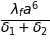

In [68]:
b

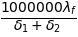

In [69]:
b.subs(a,10)

In [64]:
f = a*10**a/((δ1+δ0)/λ1 + (δ2+δ0)/λ2) * 0.6*P/H

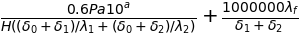

In [66]:
Add(f,b,evaluate=False)

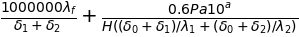

In [60]:
expr

In [12]:
expr = sympy.sympify('x**3+y**3+z**3 -3*x*y*z +x +x', evaluate=False)

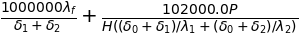

In [21]:
expr

In [25]:
from sympy import *
x, y, z, t = symbols('x y z t')

In [26]:
Add(x, x, evaluate=False)

In [44]:
du(x,x,1,evaluate=False )

False

In [50]:
pprint(x+x,order='none')

2⋅x


In [28]:
paramater_dict= {
    "K":["接触熱伝導率","W/m2K"],
    "δ1":["材料1の表面粗さ","μm"],
    "δ2":["材料2の表面粗さ","μm"],
    "λ1":["材料1の熱伝導率","W/mK"],
    "λ2":["材料2の熱伝導率","W/mK"],
    "λf":["雰囲気ガスの熱伝導率","W/mK"],
    "P":["接触面の押付圧力","MPa"],
    "H":["柔らかい方の材料のビッカース硬さ","kg/mm"],
    "δ0":["接触相当長さ(定数)","μm"]
    }

In [26]:
import pandas as pd
import re

def create_symbol(paramater_dict):
    """パラメータ辞書をインプットとして、sympyのシンボルを作成します
    Arguments:
        paramater_dict {dict} -- "シンボル名"：["パラメータ名","単位"]
    """
    out = []
    out_g = []
    for para in paramater_dict:
        #パラメータを作る　二文字以上の場合は下付文字にする　e付は数式表示用
        if len(para) !=1:
            temp = para[:1]+"_"+para[1:]
        else:
            temp = para
        out_g.append(para)

        #単位を作成する 数字は上付きにして、_は・に変換する
        unit = paramater_dict[para][1]
        numerical_list = re.findall('[0-9]' , unit)

        if len(numerical_list) != 0:
            t = numerical_list[0]
            unit = unit.replace(t,"^"+t)
            unit =  "{" + unit +"}"
        elif unit.find("_") != 0:
            unit = unit.replace("_"," \cdot ")

        unit = "(" + unit + ")"
        out.append([para,temp])
        out.append(["e"+para,temp])
        out.append([paramater_dict[para][1],unit])

        df = pd.DataFrame(out)
        df = df.drop_duplicates()
        out = df.values.tolist()
    for elm in out:
        print(elm[0] +"= Symbol('" +elm[1] +"')" )
    g=""
    for elm in out_g:
        g = g + elm +","
    print("global "+ g[:-1])

In [29]:
create_symbol(paramater_dict)

K= Symbol('K')
eK= Symbol('K')
W/m2K= Symbol('({W/m^2K})')
δ1= Symbol('δ_1')
eδ1= Symbol('δ_1')
μm= Symbol('(μm)')
δ2= Symbol('δ_2')
eδ2= Symbol('δ_2')
λ1= Symbol('λ_1')
eλ1= Symbol('λ_1')
W/mK= Symbol('(W/mK)')
λ2= Symbol('λ_2')
eλ2= Symbol('λ_2')
λf= Symbol('λ_f')
eλf= Symbol('λ_f')
P= Symbol('P')
eP= Symbol('P')
MPa= Symbol('(MPa)')
H= Symbol('H')
eH= Symbol('H')
kg/mm= Symbol('(kg/mm)')
δ0= Symbol('δ_0')
eδ0= Symbol('δ_0')
global K,δ1,δ2,λ1,λ2,λf,P,H,δ0


In [1]:
from sympy import Symbol,pi,Eq
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:


#使用するシンボルはグローバルで定義
σmax= Symbol('σ_max')
eσmax= Symbol('σ_max')
MPa= Symbol('(MPa)')
Mmax= Symbol('M_max')
eMmax= Symbol('M_max')
N_mm= Symbol('(N \cdot mm)')
Z= Symbol('Z')
eZ= Symbol('Z')
mm3= Symbol('({mm^3})')
F= Symbol('F')
eF= Symbol('F')
N= Symbol('(N)')
L= Symbol('L')
eL= Symbol('L')
mm= Symbol('(mm)')


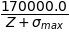

In [21]:
display(1.7*10**5/(Z + σmax))

In [24]:
from sympy import *

# a,b,c,d,x,yを記号として定義
var ("a b c d x y")

expr = d * b*x**2 + a*x**3 + c*x

In [25]:
expr